In [109]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

In [110]:
df=datasets.load_iris()

In [111]:
X=df.data[:,:4]
Y1=df.target

In [112]:
Y=pd.get_dummies(Y1).values

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.2,random_state=0)

In [114]:
model=Sequential()
model.add(Dense(3,input_dim=4,activation='softmax'))

In [115]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [124]:
estimate=model.fit(xtrain,ytrain,validation_split=.2,epochs=220,batch_size=7)

Epoch 1/220
14/14 [==============================] - 0s 9ms/step - loss: 0.4513 - acc: 0.7292 - val_loss: 0.5642 - val_acc: 0.5417
Epoch 2/220
14/14 [==============================] - 0s 5ms/step - loss: 0.4505 - acc: 0.7292 - val_loss: 0.5653 - val_acc: 0.5417
Epoch 3/220
14/14 [==============================] - 0s 6ms/step - loss: 0.4491 - acc: 0.7292 - val_loss: 0.5618 - val_acc: 0.5417
Epoch 4/220
14/14 [==============================] - 0s 5ms/step - loss: 0.4480 - acc: 0.7292 - val_loss: 0.5576 - val_acc: 0.5417
Epoch 5/220
14/14 [==============================] - 0s 6ms/step - loss: 0.4473 - acc: 0.7292 - val_loss: 0.5571 - val_acc: 0.5417
Epoch 6/220
14/14 [==============================] - 0s 5ms/step - loss: 0.4459 - acc: 0.7292 - val_loss: 0.5519 - val_acc: 0.5417
Epoch 7/220
14/14 [==============================] - 0s 6ms/step - loss: 0.4449 - acc: 0.7292 - val_loss: 0.5528 - val_acc: 0.5417
Epoch 8/220
14/14 [==============================] - 0s 9ms/step - loss: 0.4441 - a

In [125]:
model.predict(xtest)

array([[3.6246894e-04, 1.2724538e-01, 8.7239218e-01],
       [1.8497249e-02, 6.3421786e-01, 3.4728482e-01],
       [9.9300003e-01, 6.8139182e-03, 1.8610903e-04],
       [1.6914470e-04, 2.8638864e-01, 7.1344221e-01],
       [9.7074729e-01, 2.8045470e-02, 1.2072524e-03],
       [1.1734463e-04, 1.1864518e-01, 8.8123751e-01],
       [9.8152292e-01, 1.7640961e-02, 8.3611917e-04],
       [1.0622031e-02, 5.0220525e-01, 4.8717263e-01],
       [6.2487032e-03, 5.0895941e-01, 4.8479187e-01],
       [3.2559793e-02, 5.6880331e-01, 3.9863694e-01],
       [7.2143058e-04, 4.3872812e-01, 5.6055051e-01],
       [1.7826257e-02, 5.1695007e-01, 4.6522361e-01],
       [9.0067126e-03, 5.9464717e-01, 3.9634612e-01],
       [7.5798528e-03, 4.6794108e-01, 5.2447909e-01],
       [7.8846300e-03, 5.1687765e-01, 4.7523767e-01],
       [9.8287189e-01, 1.6600505e-02, 5.2756770e-04],
       [9.9737942e-03, 4.7803900e-01, 5.1198727e-01],
       [1.0695680e-02, 5.7582772e-01, 4.1347659e-01],
       [9.5278305e-01, 4.441

In [126]:
preds=model.predict(xtest)
preds_=np.argmax(preds,axis=1)
preds1=np.argmax(ytest,axis=1)

In [127]:
preds_

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [128]:
preds1

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [129]:
print(classification_report(preds_,preds1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.77      1.00      0.87        10
           2       1.00      0.67      0.80         9

    accuracy                           0.90        30
   macro avg       0.92      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [130]:
mean_absolute_error(preds_,preds1)

0.1

In [131]:
accuracy_score(preds_,preds1)

0.9

In [132]:
plt.style.use(['Solarize_Light2'])

<AxesSubplot:>

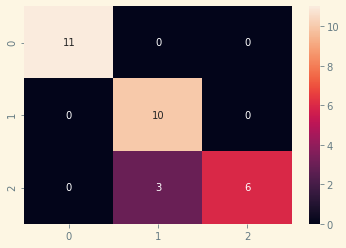

In [133]:
c=confusion_matrix(preds_,preds1)
sns.heatmap(c,annot=True)

In [134]:
c

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  6]])

In [135]:
estimate.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

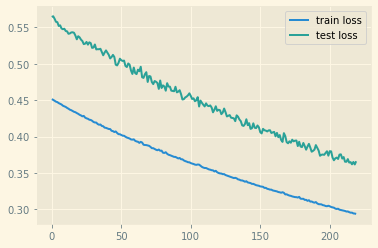

In [136]:
labels=['train loss','test loss']
plt.plot(estimate.history['loss'])
plt.plot(estimate.history['val_loss'])
plt.legend(labels)

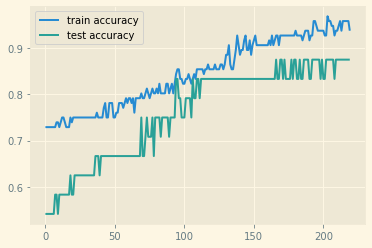

In [137]:
labels=['train accuracy','test accuracy']
plt.plot(estimate.history['acc'])
plt.plot(estimate.history['val_acc'])
plt.legend(labels)

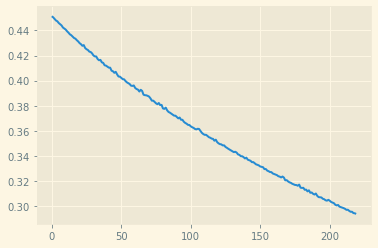

In [138]:
loss=estimate.history['loss']
epoch=range(0,len(loss))
plt.plot(epoch,loss)

In [139]:
estimate.params

{'verbose': 1, 'epochs': 220, 'steps': 14}

In [140]:
print(model.weights)

[<tf.Variable 'dense_2/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.32430816,  0.14423817,  0.09367166],
       [ 0.91490155, -0.51986575, -1.0325637 ],
       [-1.8756483 ,  0.12110525,  0.315795  ],
       [-1.5434412 , -0.8615976 ,  1.0031992 ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(3,) dtype=float32, numpy=array([ 1.3034633 ,  0.40628424, -1.4081843 ], dtype=float32)>]


In [141]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [91]:
import pickle

In [97]:
pickle.dump(model, open('model_hm.pkl', 'wb'))


INFO:tensorflow:Assets written to: ram://c39a5666-f169-445b-a276-2c01ca0f2ef8/assets


In [98]:
pickled_model = pickle.load(open('model_hm.pkl', 'rb'))
